**Q1) Problem statement:**<br>

You have been hired as a Machine Learning analyst for a reputed bank in Canada. You are incharge of approving or rejecting credit card applications by analyzing the customer data provided to you. Since the number of applications submitted to the bank increases day by day, the Senior Manager of the bank decides to automate the process and suggests to build a Machine Learning algorithm to analyze and predict an outcome for every credit card application submitted. You are asked to carry out the same and required to provide the best model to the Manager so that the model can be used for production environment immediately. You are given 2 weeks time to work on this assignment and provide an optimal model to the Manager.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('crx.csv')
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


**Q2) Do data cleaning/pre-processing as required and explain what you have done for your dataset and why?**

To find out more about our data, we perform value_counts for every column and check for null values.<br>
We also find out the datatype of every column to check if prior type casting is required.

In [25]:
for i in df.columns:
    print(df[i].value_counts())


b    468
a    210
?     12
Name: A1, dtype: int64
?        12
22.67     9
20.42     7
23.58     6
19.17     6
         ..
52.33     1
29.17     1
27.17     1
20.25     1
38.75     1
Name: A2, Length: 350, dtype: int64
1.500     21
0.000     19
3.000     19
2.500     19
1.250     16
          ..
12.125     1
13.915     1
22.000     1
12.835     1
10.915     1
Name: A3, Length: 215, dtype: int64
u    519
y    163
?      6
l      2
Name: A4, dtype: int64
g     519
p     163
?       6
gg      2
Name: A5, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64
0.000    70
0.250    35
0.040    33
1.000    31
0.125    30
         ..
3.960     1
2.040     1
1.040     1
4.165     1
5.375     1
Name: A8, Length: 132, dtype: int64
t    361
f    329

In [26]:
df.dtypes

A1         object
A2         object
A3        float64
A4         object
A5         object
A6         object
A7         object
A8        float64
A9         object
A10        object
A11         int64
A12        object
A13        object
A14        object
A15         int64
Target     object
dtype: object

From the above results, the null values are represented as "?". We first replace "?" with "NaN" for better interpretability<br>
For all the categorical columns containing "NaN", we can replace "NaN" with the letter appearing maximum number of times.<br>
For all numerical columns containing "NaN", we replace it with mean imputed values.<br>
Columns A2 and A14 are object datatypes, Hence we convert it to float datatype since it contains numeric values.

In [27]:
df = df.replace(to_replace="?",value=np.nan)

In [28]:
### Total number of NaN values
df.isna().sum().sum()

67

In [29]:
### Replacing NaN values in categorical columns with maximum occurance character in each column.
categorical_cols = ['A1','A4','A5','A6','A7','A9','A10','A11','A12','A13']
df[categorical_cols] = df[categorical_cols].apply(lambda col:col.fillna(col.value_counts().index[0]))

In [30]:
df[['A2','A14']] = df[['A2','A14']].astype(float)

In [31]:
### Now the remaining columns containing NaN values are from numerical columns. Hence we can directly apply fillna to replace NaN with column mean
df = df.fillna(df.mean())

In [32]:
### Check if all the null values have been imputed
df.isna().sum().sum()

0

To protect confidentiality of the customer data information,  majority of the columns are given meaningless values or letters. There are 10 columns in this dataset that contains categorical variables. Hence one-hot-encoding is performed across the dataframe to convert string characters to numeric. This helps in giving meaningful values to create plots and perform ML algorithms.

In [33]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col)) 
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,+
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,+
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,+
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,+
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,-
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,-
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,-
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,-


The target column contains symbols such as "+" and "-" which represents "approved" and "rejected" applications. In order for the ML algorithms to understand and process, we convert the symbols to 0 and 1 respectively.

In [34]:
df = df.replace(to_replace=["+", "-"],value=[0,1])
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,2,4,3,1.25,0,0,0,0,0,260.0,0,1
686,0,22.67,0.750,1,0,1,7,2.00,0,1,2,1,0,200.0,394,1
687,0,25.25,13.500,2,2,5,2,2.00,0,1,1,1,0,200.0,1,1
688,1,17.92,0.205,1,0,0,7,0.04,0,0,0,0,0,280.0,750,1


Now the dataset is cleaned and ready for visualization

**Q3) Explain your dataset. Explore your dataset and provide at least 5 meaningful charts/graphs with an explanation.**

The dataset contains 15 input features and 1 output feature (target column). The data is given for every customer and to protect the confidentiality, some features contain meaningless characters/one hot encoded. There are also some missing values in the dataset and in the above steps, we have replaced the missing values with relevant details and converted the one-hot-encoded data to numerical data. Since this is a classification problem, the target data contains 0's or  1's meaning the applications are "approved" or "rejected" respectively.

Let's take a look at the difference in distribution for some variables between approved and rejected applications

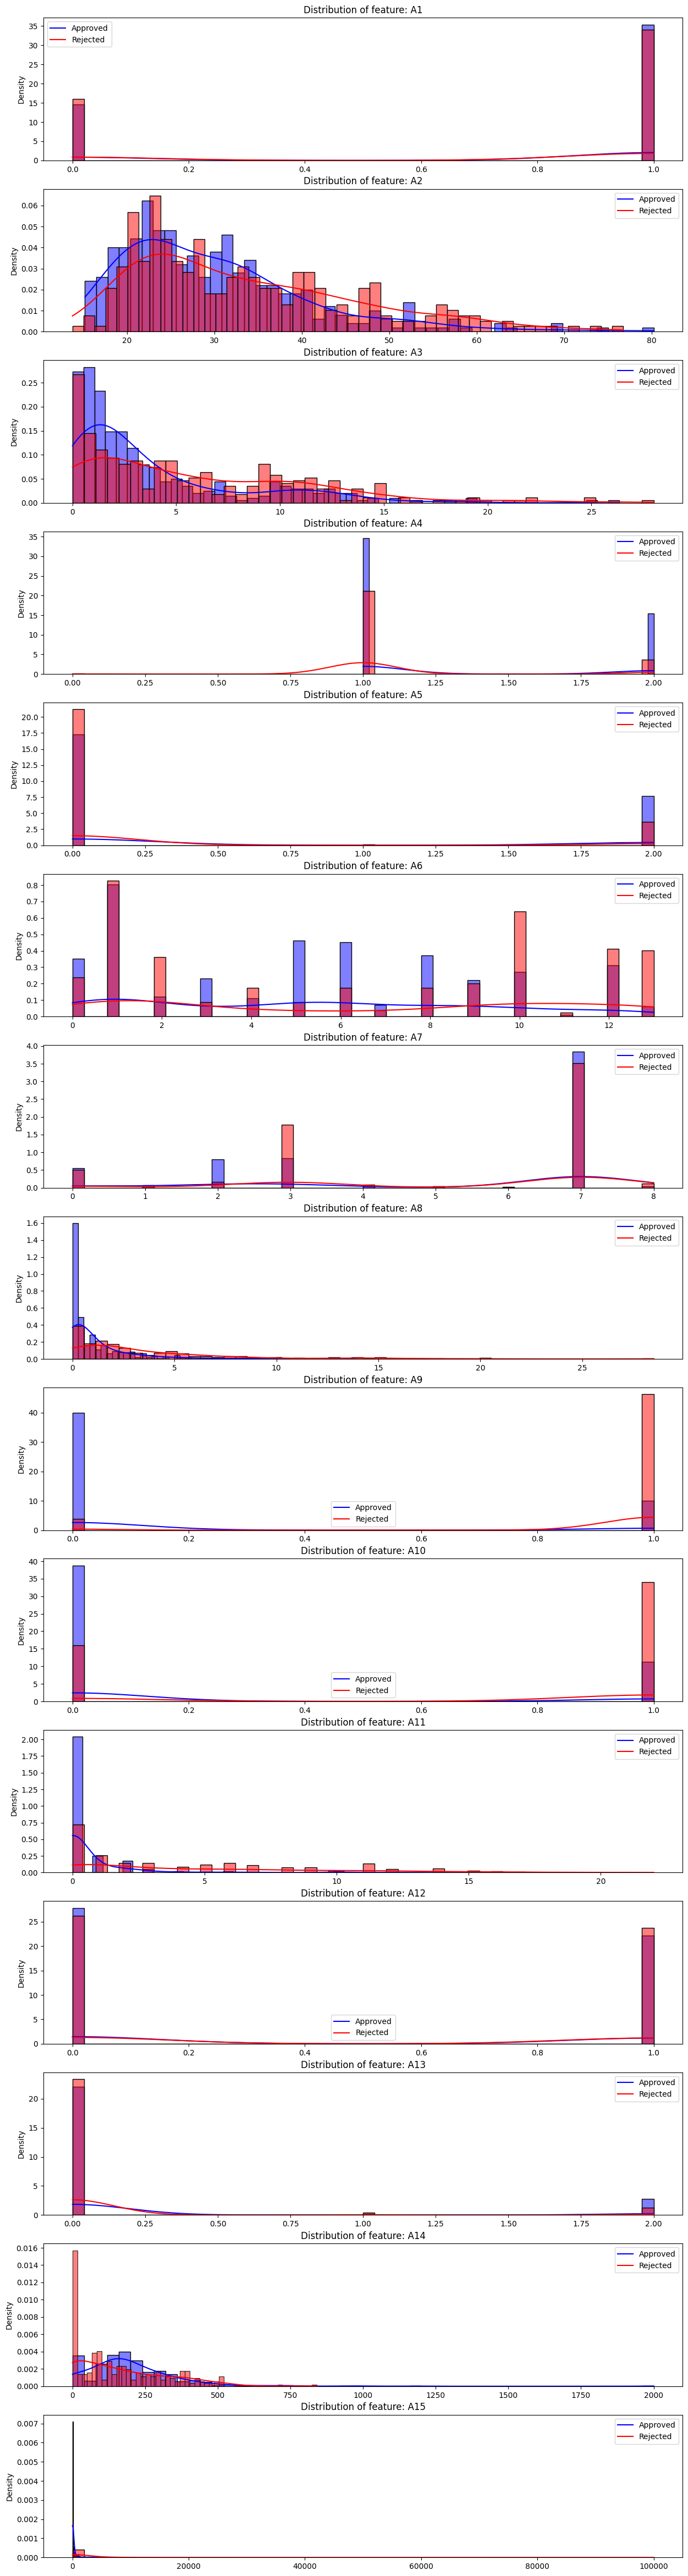

In [35]:
import matplotlib.gridspec as gridspec
import seaborn as sns
features=[f for f in df.columns if 'A' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(df[feat][df['Target']==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(df[feat][df['Target']==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['Approved', 'Rejected'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

From the above plots, we can infer that features A2, A3, A6, A8 and A14 show very high variance on rejected applications, Hence these features should be taken into consideration while modeling.

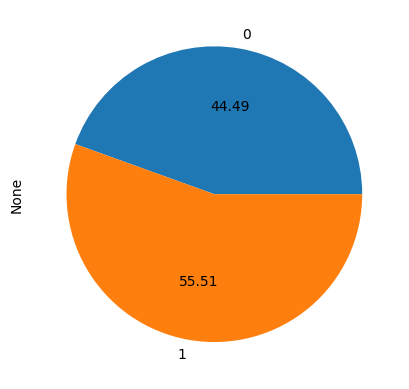

In [36]:
df.groupby('Target').size().plot(kind='pie', autopct='%.2f')

The pie chart explains the percentage of approved and rejected applications.<br>
The blue area on the graph (0) represents approved applications.<br>
The orange area (1) represents rejected applications<br>
This shows that our dataset is balanced and does not require any pre-processing for class imbalance

Through feature importance, we can estimate the most important features required for ML modeling.

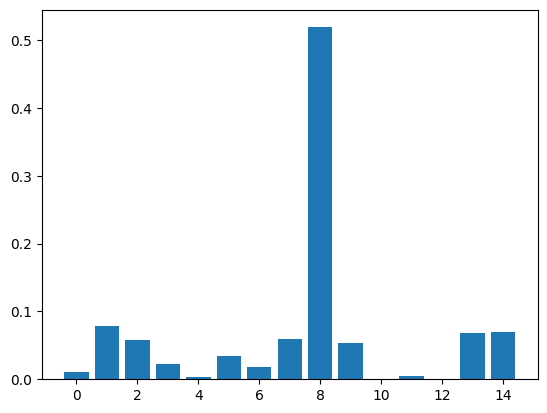

In [37]:
from sklearn.tree import DecisionTreeRegressor

x = df.iloc[:,0:15]
y = df['Target']

model = DecisionTreeRegressor(random_state=0)
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The x axis in the above plot (0,1,2....14) represents features A1, A2 ...A15. <br>
Features A5, A11, A12 and A13 does not contribute much to the prediction. Hence we can drop those features during modeling.

In [38]:
cormat = df.corr()
round(cormat,2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
A1,1.00,0.04,-0.04,0.07,0.07,-0.02,0.05,0.09,-0.03,-0.08,-0.04,0.05,0.09,0.08,-0.00,0.03
A2,0.04,1.00,0.20,-0.09,-0.10,0.01,-0.17,0.39,0.20,0.08,0.22,0.05,-0.01,-0.08,0.02,-0.16
A3,-0.04,0.20,1.00,-0.09,-0.08,0.02,-0.05,0.30,0.24,0.17,0.27,-0.01,-0.12,-0.22,0.12,-0.21
A4,0.07,-0.09,-0.09,1.00,0.98,-0.05,-0.03,-0.08,-0.13,-0.16,-0.13,-0.00,-0.05,0.00,-0.12,0.19
A5,0.07,-0.10,-0.08,0.98,1.00,-0.06,-0.03,-0.07,-0.14,-0.17,-0.14,0.01,-0.02,0.01,-0.03,0.19
A6,-0.02,0.01,0.02,-0.05,-0.06,1.00,-0.00,0.04,0.11,0.13,0.03,0.07,-0.01,0.08,0.00,-0.13
A7,0.05,-0.17,-0.05,-0.03,-0.03,-0.00,1.00,-0.10,-0.04,-0.00,-0.06,-0.01,0.04,-0.02,-0.02,-0.00
A8,0.09,0.39,0.30,-0.08,-0.07,0.04,-0.10,1.00,0.35,0.22,0.34,0.14,-0.02,-0.08,0.05,-0.32
A9,-0.03,0.20,0.24,-0.13,-0.14,0.11,-0.04,0.35,1.00,0.43,0.43,0.09,-0.11,-0.07,0.09,-0.72
A10,-0.08,0.08,0.17,-0.16,-0.17,0.13,-0.00,0.22,0.43,1.00,0.66,0.02,-0.24,-0.05,0.08,-0.46


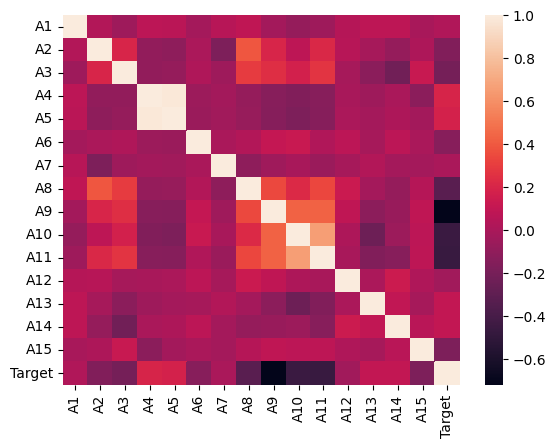

In [39]:
sns.heatmap(cormat)

Since heatmaps provide us with an easy tool to understand the correlation between two entities, they can be used to visualize the correlation among the features of a machine learning model. We can identify highly and negatively correlated features and drop any one feature before training the model.<br> 
From the above heatmap we can bring following conclusions.<br>
a) Features A5 and A4 are highly corelated. Hence either one of the feature can be dropped. A5 is dropped in this case.<br>
b) Features A11 and A10 are highly corelated. Hence either one of the feature can be dropped. A11 is dropped in this case.


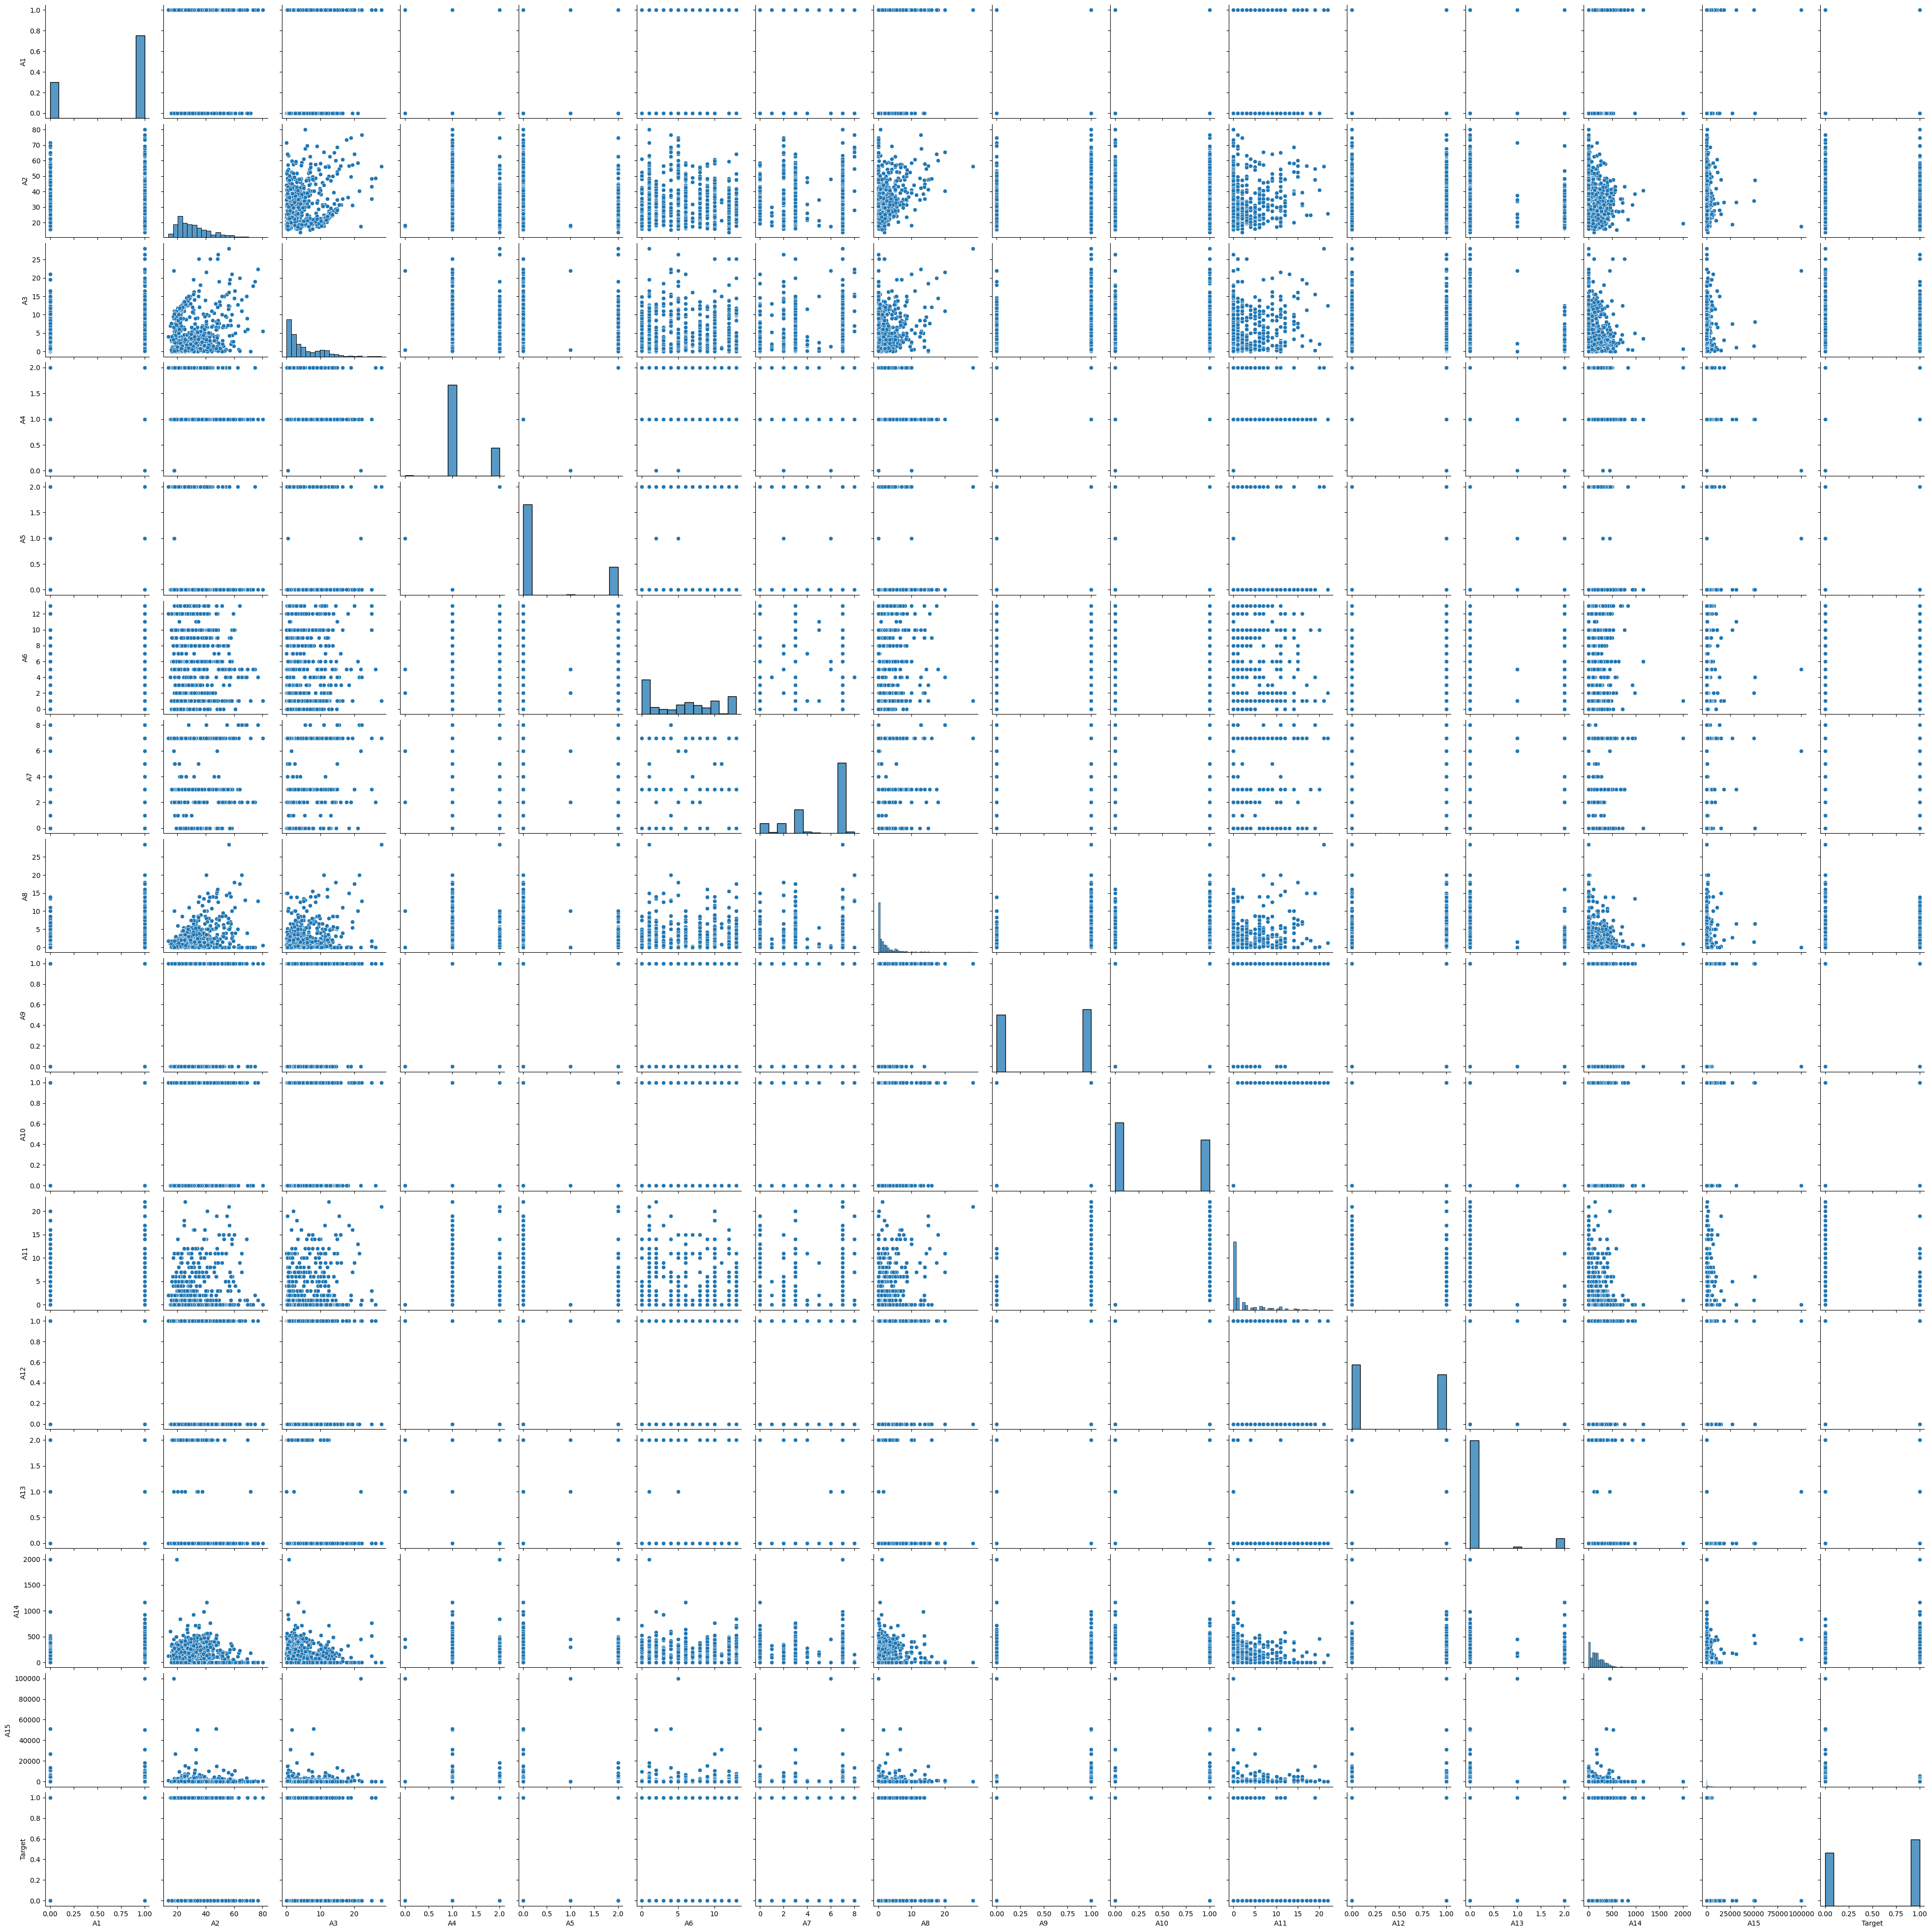

In [18]:
sns.pairplot(df)

From the above pairplots, we can draw inference on which features depends on target data. Features A2,A3, A8 and A14 show some dependencies on target data. Hence these features must be used in ML model. Features A5, A12 and A13 shows no dependencies on target data hence these features should not be considered. As per the graph, since majority of the features are non-linearly related we can pick Logistic Regression or Decision Trees or Random Forests for ML modeling.

**Q4) Implement 2 machine learning models and explain which algorithms you have selected and why. Compare them and show success metrics
(Accuracy/RMSE/Confusion Matrix) as per your problem. Explain results.**

In [40]:
df = df.drop(['A5','A11','A12','A13'], axis=1)
df

,A1,A2,A3,A4,A6,A7,A8,A9,A10,A14,A15,Target
0,1,30.83,0.000,1,12,7,1.25,1,1,202.0,0,0
1,0,58.67,4.460,1,10,3,3.04,1,1,43.0,560,0
2,0,24.50,0.500,1,10,3,1.50,1,0,280.0,824,0
3,1,27.83,1.540,1,12,7,3.75,1,1,100.0,3,0
4,1,20.17,5.625,1,12,7,1.71,1,0,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21.08,10.085,2,4,3,1.25,0,0,260.0,0,1
686,0,22.67,0.750,1,1,7,2.00,0,1,200.0,394,1
687,0,25.25,13.500,2,5,2,2.00,0,1,200.0,1,1
688,1,17.92,0.205,1,0,7,0.04,0,0,280.0,750,1


In [49]:
X = df.iloc[:,:11]
y = df['Target']

We need to standardize the data, since the features contains a range of values. Standardization helps in reducing the bias of the model and helps in improving the accuracy score. Hence we first split the data into train and test sets. We fit and transform Minmax scaler on train datset and only transform on test dataset

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**MODEL 1 - LOGISTIC REGRESSION:**<br>
Logistic regression is easier to implement, interpret, and very efficient to train. If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting. It makes no assumptions about distributions of classes in feature space.
We are using this model to check the prediction as most features show a non-linear pattern w.r.t the target. Standardized data is used for training and testing the model.

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(scaled_X_train,y_train)
y_pred = log_reg.predict(scaled_X_test)

array([[66, 13],
       [14, 80]])

In [57]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
print("Model Accuracy: ", log_reg.score(scaled_X_test, y_test))
print("Model F1 Score", f1_score(y_test, y_pred))
print("Model Mean Squared Error", mean_squared_error(y_test,y_pred))

Model Accuracy:  0.8439306358381503
Model F1 Score 0.8556149732620322
Model Mean Squared Error 0.15606936416184972


**MODEL 2 - DECISION TREE CLASIFIER:**<br>
One of the strengths of a decision tree model is that it produces results that are easy to understand in terms of the predictor variables and target variables. Can be useful for detecting important variables, interactions, and identifying outliers.Can handle data of different types, including continuous, categorical, ordinal, and binary. We are using this model to check the prediction as most features show a non-linear pattern w.r.t the target. Standardized data is used for training and testing the model.

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(scaled_X_train,y_train)
y_pred = clf.predict(scaled_X_test)

In [59]:
print("Model Accuracy: ", clf.score(scaled_X_test, y_test))
print("Model F1 Score", f1_score(y_test, y_pred))
print("Model Mean Squared Error", mean_squared_error(y_test,y_pred))

Model Accuracy:  0.7976878612716763
Model F1 Score 0.8205128205128204
Model Mean Squared Error 0.2023121387283237


**CONCLUSION:**<br>
Logistic Regression (Model 1) gives a better prediction closer to the target and this can be inferred from the accuracy, f1 score, rmse values of both the models 1 & 2. Higher the F1 score, better is the model that perfectly classifies each observation into the correct class. Logistic regression is the best model since it has f1 score of 0.856 which is a better score compared to 0.798 of Decision tree classifier. MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. Lower value indicates better fit. Hence Logistic Regression once again proves to be a better model.<br><br>
Therefore the given dataset is cleaned, analyzed and modeled to predict the success of credit card applications to being approved or rejected. The optimal model provided to Senior manager of the bank will be Logistic Regression with the following performance metrics:<br><br>
Model Accuracy:  0.8439306358381503<br>
Model F1 Score: 0.8556149732620322<br>
Model Mean Squared Error: 0.15606936416184972
